In [1]:
import xml.dom.minidom as Dom 
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt # plt 用于显示图片
%matplotlib inline

In [4]:
def ar_count(root_dir,img_dir,txt_dir):       
    for root, dirs, files in os.walk(os.path.join(root_dir,img_dir)):
        all_ar=[];
        #image path
        for file in files:
            image_name=file
            label_name=file[0:-4]+'.txt'          
            label_path=os.path.join(root_dir,txt_dir,label_name)
            label=open(label_path,'r')            
            first_line=True            
            for line in label.readlines():
                if first_line:
                    line=line.decode('utf-8-sig').strip()
                else:
                    line=line.strip()
                #print(line)
                bbs=line.split(',')
                x1=(float(bbs[0].encode("utf-8")))
                y1=(float(bbs[1].encode("utf-8")))
                
                x2=(float(bbs[2].encode("utf-8")))
                y2=(float(bbs[3].encode("utf-8")))
                
                x3=(float(bbs[4].encode("utf-8")))
                y3=(float(bbs[5].encode("utf-8")))
                
                x4=(float(bbs[6].encode("utf-8")))
                y4=(float(bbs[7].encode("utf-8")))
                
                d1=np.sqrt((x1-x2)**2+(y1-y2)**2)
                d2=np.sqrt((x2-x3)**2+(y2-y3)**2)
                ar=float(d1)/(float(d2))
                if ar<1:
                    ar=1/ar
                all_ar.append(ar)
                        
            label.close()   
    return all_ar

In [44]:
def rota_count(root_dir,img_dir,txt_dir):       
    for root, dirs, files in os.walk(os.path.join(root_dir,img_dir)):
        all_angle=[];
        #image path
        for file in files:
            image_name=file
            label_name=file[0:-4]+'.txt'          
            label_path=os.path.join(root_dir,txt_dir,label_name)
            label=open(label_path,'r')            
            first_line=True            
            for line in label.readlines():
                if first_line:
                    line=line.decode('utf-8-sig').strip()
                else:
                    line=line.strip()
                #print(line)
                bbs=line.split(',')
                x1=int(float(bbs[0].encode("utf-8")))
                y1=int(float(bbs[1].encode("utf-8")))
                
                x2=int(float(bbs[2].encode("utf-8")))
                y2=int(float(bbs[3].encode("utf-8")))
                
                x3=int(float(bbs[4].encode("utf-8")))
                y3=int(float(bbs[5].encode("utf-8")))
                
                x4=int(float(bbs[6].encode("utf-8")))
                y4=int(float(bbs[7].encode("utf-8")))
                if x1==x2:
                    angle=0
                else:
                    slope=(y2-y1)/(x2-x1)
                    angle=np.abs(np.arctan(slope)*180/3.14)           
                all_angle.append(angle)            
            label.close()   
    return all_angle

In [45]:
def diff_count(root_dir,img_dir,txt_dir):   
    diff_num=0;
    easy_num=0
    for root, dirs, files in os.walk(os.path.join(root_dir,img_dir)):
        #image path
        for file in files:
            image_name=file
            label_name=file[0:-4]+'.txt'          
            label_path=os.path.join(root_dir,txt_dir,label_name)
            label=open(label_path,'r')            
            first_line=True            
            for line in label.readlines():
                if first_line:
                    line=line.decode('utf-8-sig').strip()
                else:
                    line=line.strip()
                #print(line)
                bbs=line.split(',')                
                content=bbs[8]
                #print(content)
                content=''.join(ch for ch in content if ch.isalnum())
                content=content.upper()
                if content=='':
                    content='###'
                    difficult='1'
                    diff_num+=1
                else:
                    difficult='0'
                    easy_num+=1               
            label.close()   
    print("diff "+str(diff_num))
    print("easy "+str(easy_num))

In [46]:
def create_xml_rotated_icdar13_train(root_dir, save_dir, generate_file,img_dir,txt_dir):
    #root_dir
    generate_list=open(generate_file,'wt')
    #train_list=open('train.txt','wt')
    #test_list=open('test.txt','wt')
    count=0
    for root, dirs, files in os.walk(os.path.join(root_dir,img_dir)):
        #image path
        for file in files:
            image_name=file
            label_name=file[0:-4]+'.txt'
            image_path=os.path.join(root_dir,img_dir,image_name)
            sub_dir='train_images'
            #print(image_path)
            I=Image.open(image_path)
            image_width,image_height=I.size
            label_path=os.path.join(root_dir,txt_dir,label_name)
            label=open(label_path,'r')
            doc = Dom.Document() 
            root_node=doc.createElement('annotation')
            doc.appendChild(root_node)
            folder_node=doc.createElement('folder')
            folder_node_value=doc.createTextNode(sub_dir)
            folder_node.appendChild(folder_node_value)
            filename_node=doc.createElement('filename')
            filename_value=doc.createTextNode(image_name)
            filename_node.appendChild(filename_value)
            size_node=doc.createElement('size')
            root_node.appendChild(size_node)
            width_node=doc.createElement('width')
            width_value=doc.createTextNode(str(image_width))
            width_node.appendChild(width_value)
            height_node=doc.createElement('height')
            height_value=doc.createTextNode(str(image_height))
            height_node.appendChild(height_value)
            depth_node=doc.createElement('depth')
            depth_value=doc.createTextNode('3')
            depth_node.appendChild(depth_value)
            size_node.appendChild(width_node)
            size_node.appendChild(height_node)
            size_node.appendChild(depth_node)
            first_line=True
            count=0
            for line in label.readlines():
                if first_line:
                    line=line.decode('utf-8-sig').strip()
                else:
                    line=line.strip()
                #print(line)
                bbs=line.split(',')
                x1=int(float(bbs[0].encode("utf-8")))
                y1=int(float(bbs[1].encode("utf-8")))
                
                x2=int(float(bbs[2].encode("utf-8")))
                y2=int(float(bbs[3].encode("utf-8")))
                
                x3=int(float(bbs[4].encode("utf-8")))
                y3=int(float(bbs[5].encode("utf-8")))
                
                x4=int(float(bbs[6].encode("utf-8")))
                y4=int(float(bbs[7].encode("utf-8")))
                loc=np.array([x1 ,y1 ,x2 ,y2 ,x3, y3, x4, y4])
                loc_x=np.array([x1 ,x2 ,x3 ,x4])
                loc_y=np.array([y1 ,y2 ,y3 ,y4])
                
                xmin=(min(x1,x2,x3,x4))
                ymin=(min(y1,y2,y3,y4))
                xmax=(max(x1,x2,x3,x4))
                ymax=(max(y1,y2,y3,y4))
                if(xmax-xmin>=ymax-ymin):
                    #long aspect ratio
                    idx=np.argsort(loc_x)
                    if(loc_y[idx[0]]<=loc_y[idx[1]]):
                        x1=loc_x[idx[0]]
                        y1=loc_y[idx[0]]
                        x4=loc_x[idx[1]]
                        y4=loc_y[idx[1]]
                    else:
                        x1=loc_x[idx[1]]
                        y1=loc_y[idx[1]]
                        x4=loc_x[idx[0]]
                        y4=loc_y[idx[0]]
                    if(loc_y[idx[2]]<=loc_y[idx[3]]):
                        x2=loc_x[idx[2]]
                        y2=loc_y[idx[2]]
                        x3=loc_x[idx[3]]
                        y3=loc_y[idx[3]]
                    else:
                        x2=loc_x[idx[3]]
                        y2=loc_y[idx[3]]
                        x3=loc_x[idx[2]]
                        y3=loc_y[idx[2]]
                else:
                    #short aspect ratio
                    idx=np.argsort(loc_y)
                    if(loc_x[idx[0]]<=loc_x[idx[1]]):
                        x1=loc_x[idx[0]]
                        y1=loc_y[idx[0]]
                        x2=loc_x[idx[1]]
                        y2=loc_y[idx[1]]
                    else:
                        x1=loc_x[idx[1]]
                        y1=loc_y[idx[1]]
                        x2=loc_x[idx[0]]
                        y2=loc_y[idx[0]]
                    if(loc_x[idx[2]]<=loc_x[idx[3]]):
                        x4=loc_x[idx[2]]
                        y4=loc_y[idx[2]]
                        x3=loc_x[idx[3]]
                        y3=loc_y[idx[3]]
                    else:
                        x4=loc_x[idx[3]]
                        y4=loc_y[idx[3]]
                        x3=loc_x[idx[2]]
                        y3=loc_y[idx[2]]
                
                xmin=str(xmin)
                ymin=str(ymin)
                xmax=str(xmax)
                ymax=str(ymax)
                x1=str(x1)
                x2=str(x2)
                x3=str(x3)
                x4=str(x4)
                y1=str(y1)
                y2=str(y2)
                y3=str(y3)
                y4=str(y4)
                content=bbs[8]
                #print(content)
                content=''.join(ch for ch in content if ch.isalnum())
                content=content.upper()
                if content=='':
                    content='###'
                    difficult='0'
                else:
                    difficult='0'
                object_node=doc.createElement('object')
                root_node.appendChild(object_node)
                name_node=doc.createElement('name')
                name_value=doc.createTextNode('text')
                name_node.appendChild(name_value)
                content_node=doc.createElement('content')
                content_value=doc.createTextNode(content)
                content_node.appendChild(content_value)
                difficult_node=doc.createElement('difficult')
                difficult_value=doc.createTextNode(difficult)
                difficult_node.appendChild(difficult_value)
                bndbox_node=doc.createElement('bndbox')
                object_node.appendChild(bndbox_node)
                x1_node=doc.createElement('x1')
                x1_value=doc.createTextNode(x1)
                x1_node.appendChild(x1_value)
                y1_node=doc.createElement('y1')
                y1_value=doc.createTextNode(y1)
                y1_node.appendChild(y1_value)
                x2_node=doc.createElement('x2')
                x2_value=doc.createTextNode(x2)
                x2_node.appendChild(x2_value)
                y2_node=doc.createElement('y2')
                y2_value=doc.createTextNode(y2)
                y2_node.appendChild(y2_value)
                x3_node=doc.createElement('x3')
                x3_value=doc.createTextNode(x3)
                x3_node.appendChild(x3_value)
                y3_node=doc.createElement('y3')
                y3_value=doc.createTextNode(y3)
                y3_node.appendChild(y3_value)
                x4_node=doc.createElement('x4')
                x4_value=doc.createTextNode(x4)
                x4_node.appendChild(x4_value)
                y4_node=doc.createElement('y4')
                y4_value=doc.createTextNode(y4)
                y4_node.appendChild(y4_value)
                xmin_node=doc.createElement('xmin')
                xmin_value=doc.createTextNode(xmin)
                xmin_node.appendChild(xmin_value)
                ymin_node=doc.createElement('ymin')
                ymin_value=doc.createTextNode(ymin)
                ymin_node.appendChild(ymin_value)
                xmax_node=doc.createElement('xmax')
                xmax_value=doc.createTextNode(xmax)
                xmax_node.appendChild(xmax_value)
                ymax_node=doc.createElement('ymax')
                ymax_value=doc.createTextNode(ymax)
                ymax_node.appendChild(ymax_value)
                bndbox_node.appendChild(x1_node)
                bndbox_node.appendChild(y1_node)
                bndbox_node.appendChild(x2_node)
                bndbox_node.appendChild(y2_node)
                bndbox_node.appendChild(x3_node)
                bndbox_node.appendChild(y3_node)
                bndbox_node.appendChild(x4_node)
                bndbox_node.appendChild(y4_node)
                bndbox_node.appendChild(xmin_node)
                bndbox_node.appendChild(ymin_node)
                bndbox_node.appendChild(xmax_node)
                bndbox_node.appendChild(ymax_node)
                object_node.appendChild(difficult_node)
                object_node.appendChild(content_node)
                object_node.appendChild(name_node)
                object_node.appendChild(bndbox_node)
                count=count+1
            root_node.appendChild(folder_node)
            root_node.appendChild(filename_node)
            root_node.appendChild(size_node)
            for i in range(0,count): 
                root_node.appendChild(object_node)
            if count>0:
                xml_file_path=save_dir+image_name[0:len(image_name)-4]+'.xml'
                f = open(xml_file_path, 'w+') 
                f.write(doc.toprettyxml(indent = "\t", newl = "\n", encoding = "utf-8")) 
                f.close()
                generate_list.write(image_path+' '+xml_file_path+'\n')
                #train_list.write(image_path+'\n')
                #test_list.write(xml_file_path+'\n')

            label.close()
    generate_list.close()

In [8]:
#creat train data
root_dir=''
save_dir="xml_9000/"
generate_file="train.txt"
img_dir='image_9000/'
txt_dir='txt_9000/'
create_xml_rotated_icdar13_train(root_dir, save_dir, generate_file,img_dir,txt_dir)

In [15]:
#creat test data
root_dir=''
save_dir="xml_1000/"
generate_file="test.txt"
img_dir='image_1000/'
txt_dir='txt_1000/'
create_xml_rotated_icdar13_train(root_dir, save_dir, generate_file,img_dir,txt_dir)

KeyboardInterrupt: 

In [47]:
root_dir=''
img_dir='image_1000/'
txt_dir='txt_1000/'
diff_count(root_dir,img_dir,txt_dir)

diff 7384
easy 14794


In [48]:
root_dir=''
img_dir='image_9000/'
txt_dir='txt_9000/'
diff_count(root_dir,img_dir,txt_dir)

diff 52961
easy 124725


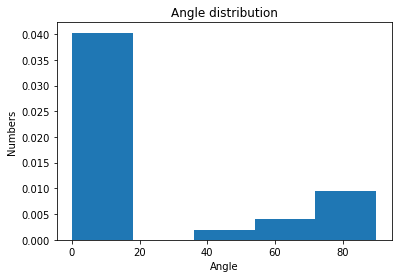

In [52]:
root_dir=''
img_dir='image_1000/'
txt_dir='txt_1000/'
angle=rota_count(root_dir,img_dir,txt_dir)
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(angle, bins=5,normed=1)
plt.title('Angle distribution')
plt.xlabel('Angle')
plt.ylabel('Numbers')
plt.show()

In [53]:
root_dir=''
img_dir='image_9000/'
txt_dir='txt_9000/'
angle=rota_count(root_dir,img_dir,txt_dir)

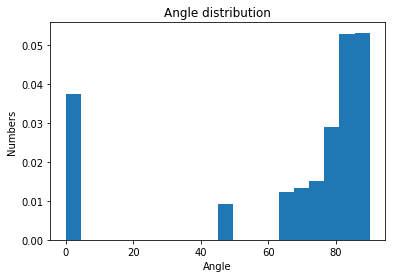

In [55]:
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(angle, bins=20,normed=1)
plt.title('Angle distribution')
plt.xlabel('Angle')
plt.ylabel('Numbers')
plt.show()

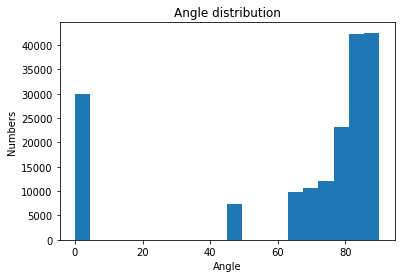

In [61]:
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
n,bins,patches=ax.hist(angle, bins=20,normed=0)
plt.title('Angle distribution')
plt.xlabel('Angle')
plt.ylabel('Numbers')
plt.show()

In [62]:
bins

array([ 0.        ,  4.49973243,  8.99946486, 13.49919729, 17.99892971,
       22.49866214, 26.99839457, 31.498127  , 35.99785943, 40.49759186,
       44.99732429, 49.49705671, 53.99678914, 58.49652157, 62.996254  ,
       67.49598643, 71.99571886, 76.49545129, 80.99518371, 85.49491614,
       89.99464857])

In [63]:
n

array([29978.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,  7353.,     0.,     0.,     0.,  9782., 10552.,
       12084., 23137., 42263., 42537.])

In [64]:
np.sum(n)

177686.0

In [67]:
(n/np.sum(n))

array([0.16871335, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04138199, 0.        , 0.        , 0.        , 0.05505217,
       0.05938566, 0.06800761, 0.13021285, 0.23785217, 0.23939421])

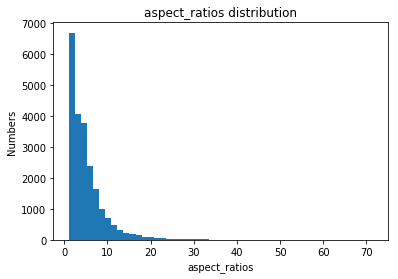

In [7]:
root_dir=''
img_dir='image_1000/'
txt_dir='txt_1000/'
angle=ar_count(root_dir,img_dir,txt_dir)
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
n,bins,patches=ax.hist(angle, bins=50,normed=0)
plt.title('aspect_ratios distribution')
plt.xlabel('aspect_ratios')
plt.ylabel('Numbers')
plt.show()

In [8]:
bins

array([ 1.  ,  2.41,  3.82,  5.23,  6.64,  8.05,  9.46, 10.87, 12.28,
       13.69, 15.1 , 16.51, 17.92, 19.33, 20.74, 22.15, 23.56, 24.97,
       26.38, 27.79, 29.2 , 30.61, 32.02, 33.43, 34.84, 36.25, 37.66,
       39.07, 40.48, 41.89, 43.3 , 44.71, 46.12, 47.53, 48.94, 50.35,
       51.76, 53.17, 54.58, 55.99, 57.4 , 58.81, 60.22, 61.63, 63.04,
       64.45, 65.86, 67.27, 68.68, 70.09, 71.5 ])

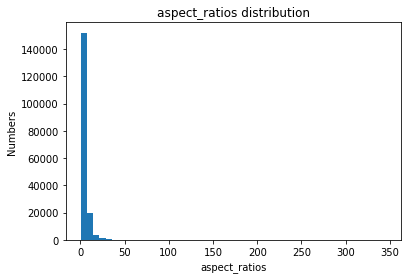

In [9]:
root_dir=''
img_dir='image_9000/'
txt_dir='txt_9000/'
angle=ar_count(root_dir,img_dir,txt_dir)
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
n,bins,patches=ax.hist(angle, bins=50,normed=0)
plt.title('aspect_ratios distribution')
plt.xlabel('aspect_ratios')
plt.ylabel('Numbers')
plt.show()

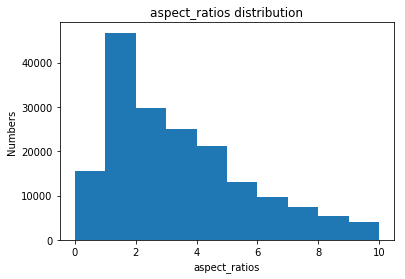

In [31]:
angle=np.array(angle)
mask=angle<10
angle_mask=angle*mask
fig = plt.figure()
ax = fig.add_subplot(111)
n,bins,patches=ax.hist(angle_mask, bins=10,normed=0)
plt.title('aspect_ratios distribution')
plt.xlabel('aspect_ratios')
plt.ylabel('Numbers')
plt.show()

In [29]:
bins

array([ 0.        ,  0.99946787,  1.99893574,  2.99840361,  3.99787148,
        4.99733935,  5.99680722,  6.99627508,  7.99574295,  8.99521082,
        9.99467869, 10.99414656, 11.99361443, 12.9930823 , 13.99255017,
       14.99201804, 15.99148591, 16.99095378, 17.99042165, 18.98988952,
       19.98935739, 20.98882525, 21.98829312, 22.98776099, 23.98722886,
       24.98669673, 25.9861646 , 26.98563247, 27.98510034, 28.98456821,
       29.98403608, 30.98350395, 31.98297182, 32.98243969, 33.98190756,
       34.98137542, 35.98084329, 36.98031116, 37.97977903, 38.9792469 ,
       39.97871477, 40.97818264, 41.97765051, 42.97711838, 43.97658625,
       44.97605412, 45.97552199, 46.97498986, 47.97445772, 48.97392559,
       49.97339346])

In [30]:
n

array([1.4900e+02, 4.6664e+04, 2.9770e+04, 2.4911e+04, 2.1224e+04,
       1.3113e+04, 9.6610e+03, 7.3810e+03, 5.4920e+03, 4.0230e+03,
       3.0320e+03, 2.2840e+03, 1.7700e+03, 1.5090e+03, 1.1130e+03,
       9.2100e+02, 6.8300e+02, 5.9600e+02, 5.2800e+02, 4.3500e+02,
       3.1300e+02, 2.7700e+02, 2.6200e+02, 2.0400e+02, 1.7800e+02,
       1.5800e+02, 1.1800e+02, 1.0100e+02, 1.0100e+02, 7.3000e+01,
       7.6000e+01, 7.1000e+01, 5.8000e+01, 5.1000e+01, 4.8000e+01,
       3.3000e+01, 4.1000e+01, 2.7000e+01, 2.2000e+01, 3.0000e+01,
       3.0000e+01, 3.0000e+01, 1.2000e+01, 2.3000e+01, 1.8000e+01,
       1.7000e+01, 1.0000e+01, 1.3000e+01, 1.7000e+01, 1.5000e+01])

In [26]:
a=np.array([1,2,34,5,6])

In [27]:
mask=a<5
mask

array([ True,  True, False, False, False])